# Análise de dados sobre jogos

### Gustavo Sanches, Lorenzo, Lucas Treuke e Vanessa B. Wille

### Introdução

<p style='text-align: justify;'> Este trabalho visa fazer uma análise exploratória sobre o mundo dos jogos, procurando entender tendências e relações sobre váriaveis como vendas, gênero, títulos, franquias... Em 2018, os games se tornaram mais lucrativos do que a indústria de Hollywood e a indústria musical combinadas, movimentando US$ 137 bilhões globalmente, além disso, estima-se que haja 2,7 bilhões de jogadores em todo o mundo (quase 1/3 da população), logo, é um assunto interessante para ser analisado. </p> 

A base de dados escolhida é do Kaggle e pode ser acessada [aqui](https://www.kaggle.com/gregorut/videogamesales).

Abaixo, estão algumas das perguntas que procuramos responder:
- Como as plataformas se destacam? Quais possuem mais títulos? Quais venderam mais?
- Como se sobressaem os títulos de franquias ou sequências grandes?
- Como é a relação entre gêneros dos jogos e as regiões de vendas? 

<p style='text-align: justify;'> Abaixo estão as bibliotecas utilizadas no decorrer do trabalho. </p> 

In [33]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

### Importação da base de dados

In [2]:
df = pd.read_csv ("vgsales.csv")
df = pd.DataFrame(df)
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


As variáveis dessa base de dados possuem as seguintes características:

In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<p style='text-align: justify;'> Além disso, é importante verificar se a base de dados não possui valores nulos. A função isnull().sum() mostra a quantidade de valores nulos para cada variável e a função dropna() remove-os, caso existirem. Além disso, a tabela é atualizada apenas até 2016, portanto, foram retirados a partir de 2017 (a tabela já não incluia 2018 e 2019, devido a informações incompletas). </p> 

In [37]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
df = df.dropna()
# Deletando algumas linhas que possuem os anos superiores à 2015 
filtro  = df['Year'] <2016
df = df[filtro]
Year = df['Year'].unique()
Year #Mostrando que agora temos apenas os anos até 2015

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980., 1983.])

<p style='text-align: justify;'> Também, é interessante ver o número de diferentes ocorrências em cada variável: </p> 

In [68]:
jogos = df['Name'].unique()
editoras = df['Publisher'].unique()
plataformas = df['Platform'].unique()
gêneros = df['Genre'].unique()

print("Número de jogos: ", len(jogos))
print("Número de editoras: ", len(editoras))
print("Número de plataformas: ", len(plataformas))
print("Número de gêneros de jogos: ", len(gêneros))

Número de jogos:  11130
Número de editoras:  564
Número de plataformas:  31
Número de gêneros de jogos:  12


### Como as plataformas se destacam? 

<p style='text-align: justify;'> Primeiramente, a partir da base de dados analisada, as plataformas podem se destacar de duas principaias maneiras: número de títulos e vendas. A seguir, tem-se uma tabela e um gráfico que mostram as 10 plataformas mais utilizadas, de acordo com a base de dados escolhida, ou seja, a quantidade de títulos por plataforma. </p> 

In [69]:
#contagem da quantidade de vezes que cada plataforma aparece na tabela
per = pd.DataFrame(df['Platform'].value_counts()) 
#tranformação em porcentagem
per['Porcentagens %'] = round(((per['Platform']/df['Platform'].count())*100),2) 
pd.DataFrame(per['Porcentagens %'].head(10)) 

,Porcentagens %
DS,13.36
PS2,13.34
Wii,8.09
PS3,7.98
X360,7.69
PSP,7.51
PS,7.46
PC,5.64
XB,5.04
GBA,4.93


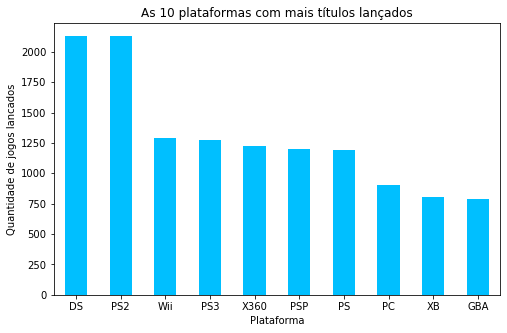

In [50]:
#criando o gráfico (principais funções: value_counts() conta as ocorências, kind=tipo de plotagem, rot=rotaciona o nome das plataformas)
df["Platform"].value_counts().head(10).plot(kind="bar", figsize=(8,5), grid = False, rot=0, color="DeepSkyBlue")  
plt.title('As 10 plataformas com mais títulos lançados') #definindo um titulo
plt.xlabel('Plataforma') #Nomeando o eixo X, onde fica o nome dos videogames 
plt.ylabel('Quantidade de jogos lancados') #Nomeando o eixo Y, onde fica a quantidade de jogos 
plt.show() #Exibindo o gráfico 


<p style='text-align: justify;'>  As plataformas que mais tiveram a maior quantidade de títulos lançados de jogos foram o Nintendo DS e o Playsation2. Ambos consoles de gerações mais antigas. Época em que a concorrência com o computador não era tão exacerbada e que o tempo de produção de jogos não era tão alto quanto nos dias atuais. Ambos fatores contribuiram para tal variedade. Mas e as vendas, correspondem ao resultado visto?
Para isso, pode-se verificar as vendas globais por plataforma, como será feito a seguir. </p> 

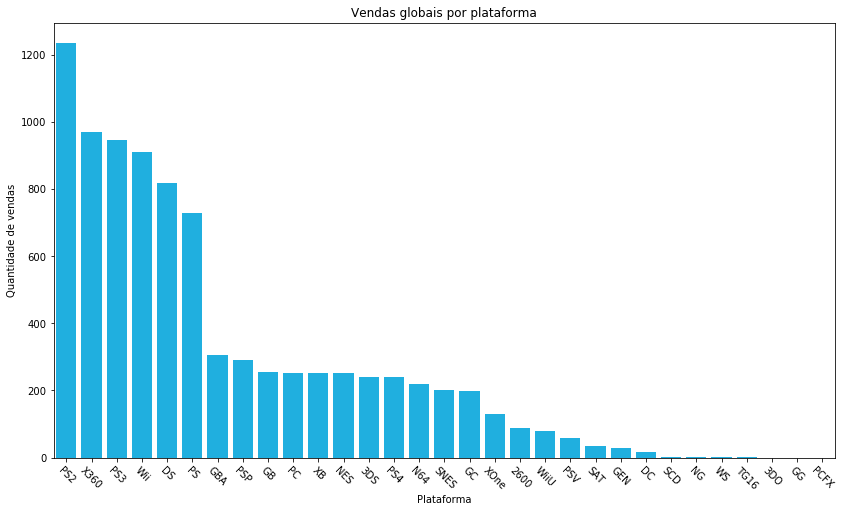

In [7]:
df1 = df[['Platform','Global_Sales']] #tabela com os dados necessários
df1=df1.groupby('Platform').sum().reset_index() #soma das vendas por plataforma
df1=df1.sort_values('Global_Sales', ascending=False).reset_index() #ordenação dos dados pelas vendas
plt.figure(figsize=(14, 8))
sns.barplot(x='Platform', y="Global_Sales", data=df1, color="DeepSkyBlue")
plt.xticks(rotation=-45)
plt.title('Vendas globais por plataforma') 
plt.xlabel('Plataforma') 
plt.ylabel('Quantidade de vendas') 
plt.show() 

<p style='text-align: justify;'> Viu-se que, de fato, as 5 plataformas com maio quantidade de títulos, são as que mais possuem vendas, contudo, a plataforma DS ocupa a 5ª posição, mesmo tendo uma considerável quantidade a mais de títulos lançados que as plataformas X360, PS3 e Wii, que ocupam posições superiores. Além disso, a distribuição, tanto das vendas quanto do número de lançamentos por plataformas possuem elevadas disparidades.
</p> 

<function matplotlib.pyplot.show(*args, **kw)>

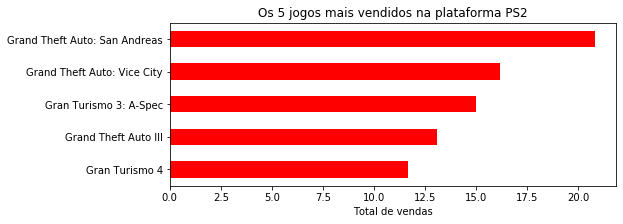

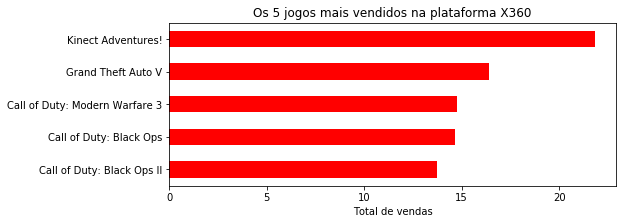

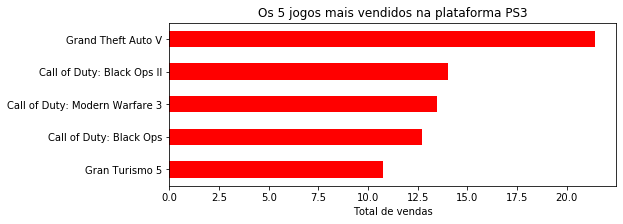

In [222]:
values=["PS2"]
ps2_df = df[df.Platform.isin(values)]
top_5_ps2 = ps2_df[['Name', 'Global_Sales']].head(5).set_index('Name').sort_values('Global_Sales', ascending=True)
top_5_ps2.plot(kind='barh', figsize=(8,3), grid=False, color='red', legend=False) 
plt.title('Os 5 jogos mais vendidos na plataforma PS2') 
plt.xlabel('Total de vendas') 
plt.ylabel('')
plt.show 

values2=["X360"]
X360_df = df[df.Platform.isin(values2)]
top_5_X360 = X360_df[['Name', 'Global_Sales']].head(5).set_index('Name').sort_values('Global_Sales', ascending=True)
top_5_X360.plot(kind='barh', figsize=(8,3), grid=False, color='red', legend=False) 
plt.title('Os 5 jogos mais vendidos na plataforma X360') 
plt.xlabel('Total de vendas') 
plt.ylabel('')
plt.show 

values=["PS3"]
ps3_df = df[df.Platform.isin(values)]
top_5_ps3 = ps3_df[['Name', 'Global_Sales']].head(5).set_index('Name').sort_values('Global_Sales', ascending=True)
top_5_ps3.plot(kind='barh', figsize=(8,3), grid=False, color='red', legend=False) 
plt.title('Os 5 jogos mais vendidos na plataforma PS3') 
plt.xlabel('Total de vendas') 
plt.ylabel('')
plt.show 

<p style='text-align: justify;'> Os cinco jogos mais vendidos para cada um dos três consoles mais populares podem ser vistos acima. É interessante ver que todos os três têm distribuições semelhantes, com cópias vendidas na faixa de 10 a 20 milhões para cada jogo. Também podemos ver que as listas de jogos mais vendidos para PS2, Xbox 360 e PS3 são completamente dominadas por apenas três franquias de videogames, a saber, Grand Theft Auto, Gran Turism o e Call of Duty. </p> 

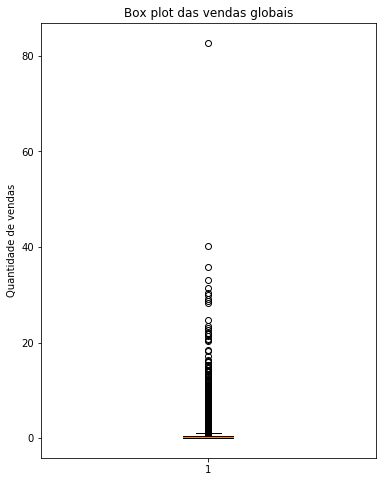

In [48]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(1,1,1)
ax.boxplot(df['Global_Sales'])
plt.title('Box plot das vendas globais') 
plt.ylabel('Quantidade de vendas') 
plt.show()

<p style='text-align: justify;'> Pelo gráfico boxplot acima, fica vísivel que existem diversos outliers, ou seja, a distribuição das vendas globais é bastante desigual (como já sugerido no gráfico de barras). O mesmo se repete com a maior parte das plataformas, como observado no boxplot a seguir. Ainda, vê-se que, em geral, a maior parte dos jogos possui vendas abaixo de 20 milhões. </p> 

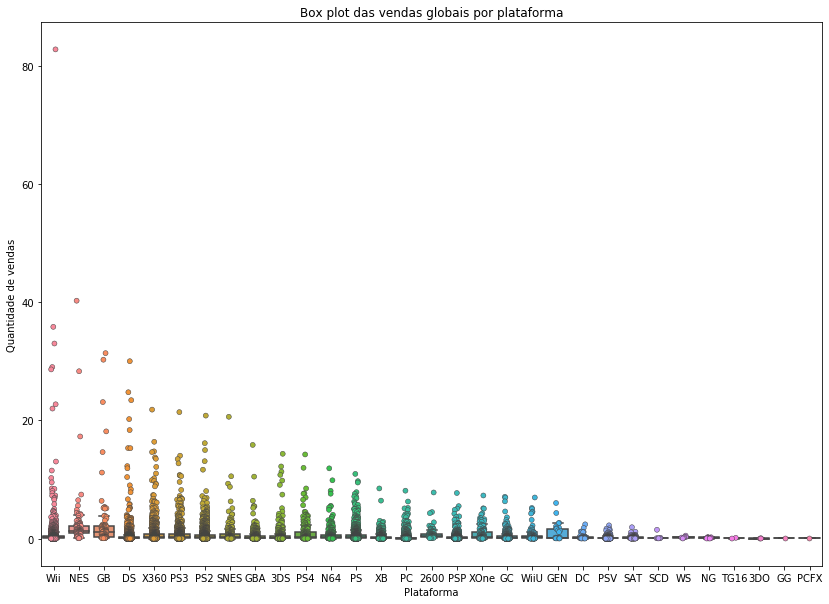

In [196]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Platform', y='Global_Sales',  data=df, fliersize=0)
sns.stripplot(x='Platform', y='Global_Sales',  data=df,
    jitter=True, dodge=True, linewidth=0.5)
plt.title('Box plot das vendas globais por plataforma') 
plt.ylabel('Quantidade de vendas (milhões $)') 
plt.xlabel('Plataforma') 
plt.show()

<p style='text-align: justify;'> Mas quais são esses maiores outliers? Qual jogo teve vendas maiores que 80 milhões?

Para visualizar essa informação, foram construídas uma tabela com os jogos mais vendidos (nessa tabela serão mostrados os com vendas acima de 20 milhões) e um gráfico de barra com os maiores destaques. </p> 

In [200]:
venda_global = df["Global_Sales"]
df.loc[venda_global > 25]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x576 with 0 Axes>

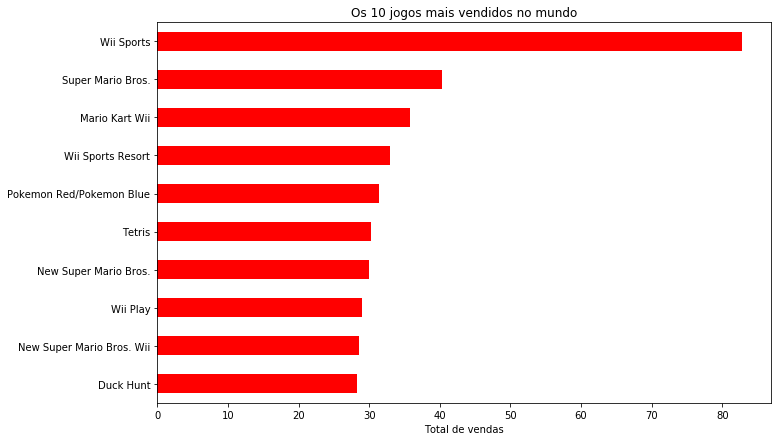

In [43]:
#0s 10 jogos mais vendidos do historia 
top_10 = df[['Name', 'Global_Sales']].head(10).set_index('Name').sort_values('Global_Sales', ascending=True)
plt.figure(figsize=(12,8))
top_10.plot(kind='barh', figsize=(11,7), grid=False, color='red', legend=False) 
plt.title('Os 10 jogos mais vendidos no mundo') 
plt.xlabel('Total de vendas') 
plt.ylabel('')
plt.show

<p style='text-align: justify;'> O jogo Wii Sports (plataforma Wii), desenvolvido pela Nintendo Entertainment Analysis & Development e publicado pela Nintendo, realmente é o maior detaque de vendas (o dobro em relação ao "segundo" colocado). O jogo é uma coleção de cinco simulações esportivas, projetadas para demonstrar os recursos de detecção de movimento do Wii Remote. Os cinco esportes incluídos são tênis, beisebol, boliche, golfe e boxe. Em segunda posição, com cerca de 48 milhões de vendas, temos o jogo Super Mario Bros. (plataforma NES), no qual os jogadores controlam Mario, ou seu irmão Luigi no modo multijogador, enquanto viajam pelo Reino dos Cogumelos para resgatar a Princesa Peach de Bowser. </p> 

<p style='text-align: justify;'> É relevante relembrar dos gráficos dos jogos mais vendidos para cada um dos consoles mais populares. Nenhum dos jogos mais vendidos dessas plataformas está entre os jogos mais vendidos do mundo. </p> 

### Ao longo do tempo, como as vendas ocorreram?

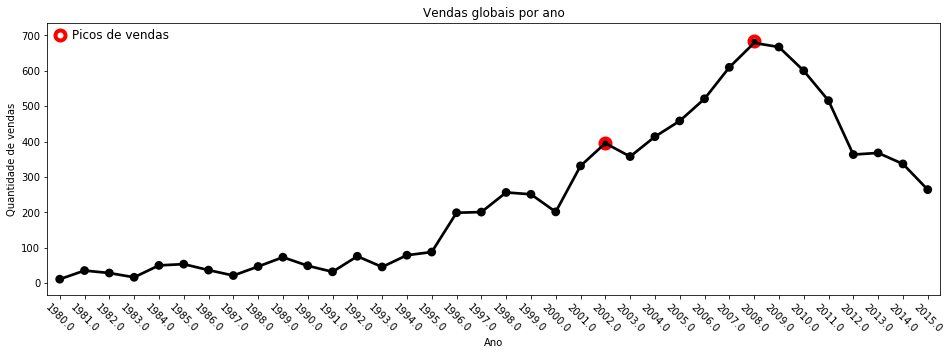

In [119]:
df_vendas_tempo = df[['Year','Global_Sales']] #tabela com os dados necessários
df_vendas_tempo=df_vendas_tempo.groupby('Year').sum().reset_index() #soma das vendas por plataforma
plt.figure(figsize=(16,5))
ax = plt.gca() #criação de pontos para destaque
ax.plot(22, 396, 'o', ms=10, mec='r', mfc='none',  mew=4,)
ax.plot(28, 684, 'o', ms=10, mec='r', mfc='none',  mew=4,)
ax.plot(0, 700, 'o', ms=10, mec='r', mfc='none',  mew=4,)
ax.annotate('Picos de vendas', xy=(0.5, 700), xytext=(0.5, 690),color='black', size='large') # anotação com o motivo dos destaques
sns.pointplot(x='Year', y='Global_Sales', data=df_vendas_tempo, color="black") 
plt.xticks(rotation=-45)
plt.xticks(rotation=-45)
plt.title('Vendas globais por ano') 
plt.xlabel('Ano') 
plt.ylabel('Quantidade de vendas') 
plt.show() 

<p style='text-align: justify;'> É possível observar um pico no ano de 2002 e outro em 2008. Basicamente, em 2000, a Sony continuou com o seu bem-sucedido Playstation e lançou a versão 2, que passou a ter mídias em formato DVD. Por sua vez, em 2001, a Nintendo trouxe o GameCube, que sucedeu o N64, além também da entrada da Microsoft no mercado, com o famoso Xbox, motivos que, provavelmente, resultaram em quase 400 milhões de jogos vendidos naquele ano. Já em 2008, os lançamentos do XBOX 360 (2005), PS3 (2006) e a "era" Wii (2006, em diante), trouxeram elevados aumentos nas vendas.  </p>
    
Mas e por que o declínio?  
    
<p style='text-align: justify;'> Um dos maiores apontamentos seria o custo benefício apresentado pelos PCs, que entregam alta qualidade gráfica por um maior período de tempo e até mesmo a saturação na indústria de jogos, com a falta de novos jogos e consoles para manter os clientes interessados, afinal, como nitidamente no gráfico a seguir, a quantidade de jogos lançados acompanha, em geral, o gráfico de vendas. Também, é importante levar em conta que, no ano de 2008, a crise financeira pode ter feito com que os consumidores reduzissem gastos desnecessários. </p>
    
<p style='text-align: justify;'>  Contudo, atualmente, parece que com a chegada do PS4, Nintendo Switch, PS5 e dos novos Xbox Series, a indústria ganhou fôlego para continuar viva por mais tempo. </p> 

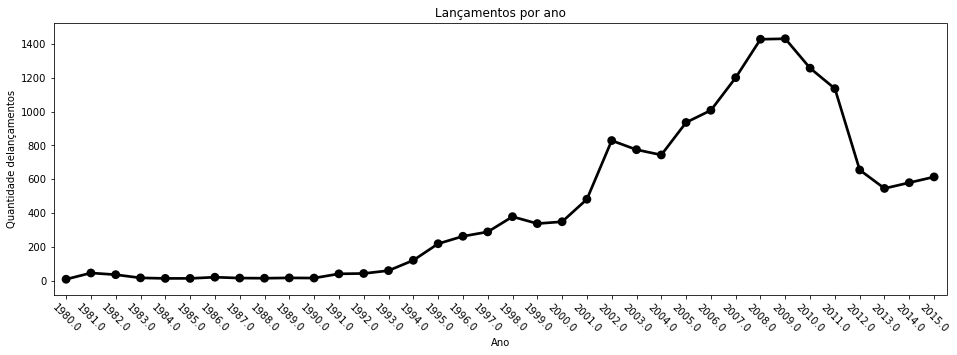

In [15]:
#definindo os lançamentos por ano
df_year = df["Year"].value_counts().reset_index()
df_year = df_year.rename(columns={'Year': 'lancamentos'})
df_year= df_year.rename(columns={'index': 'year'})
df_year=df_year.sort_values('year')
#plotagem
plt.figure(figsize=(16,5))
sns.pointplot(x='year', y='lancamentos', data=df_year, color="black") 
plt.xticks(rotation=-45)
plt.xticks(rotation=-45)
plt.title('Lançamentos por ano') 
plt.xlabel('Ano') 
plt.ylabel('Quantidade delançamentos') 
plt.show() 

In [42]:
import  plotly.graph_objects  as  go 
fig  =  go.FigureWidget (data =go.Bar( y = [ 2,  3,  1 ])) 
fig.show


<bound method BaseFigure.show of FigureWidget({
    'data': [{'type': 'bar', 'uid': 'e5605979-9409-4d45-b8af-9e4aca16dc5b', 'y': [2, 3, 1]}],
    'layout': {'template': '...'}
})>

### E as vendas por região? 

<p style='text-align: justify;'> O gráfico a seguir, sobre as vendas por região ao decorrer do tempo, demonstra a predominância da América do Norte no mercado de jogos, e que, em linhas gerais, o Japão é a região que mais se distancia das tendências globais (comparando a resultados obtidos anteriormente).

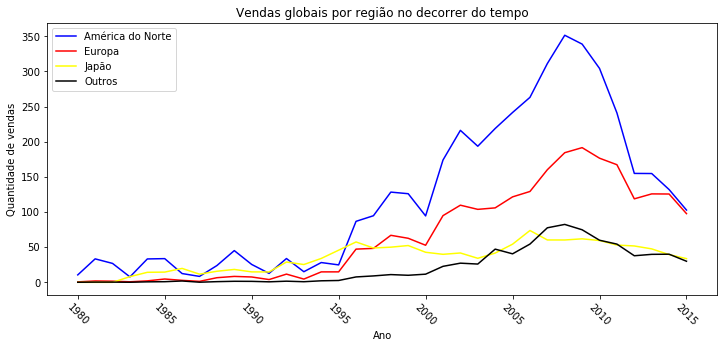

In [240]:
#Definindo as vendas por região
tna=df.groupby('Year')['NA_Sales'].sum().reset_index().sort_values("Year",ascending=True)
teu=df.groupby('Year')['EU_Sales'].sum().reset_index().sort_values("Year",ascending=True)
tjp=df.groupby('Year')['JP_Sales'].sum().reset_index().sort_values("Year",ascending=True)
tot=df.groupby('Year')['Other_Sales'].sum().reset_index().sort_values("Year",ascending=True)
#plotando o gráfico
plt.figure(figsize=(12,5))
sns.lineplot(x='Year', y='NA_Sales', data=tna, color="blue", label= "América do Norte")
sns.lineplot(x='Year', y='EU_Sales', data=teu, color="red", label= "Europa")
sns.lineplot(x='Year', y='JP_Sales', data=tjp, color="yellow", label= "Japão")
sns.lineplot(x='Year', y='Other_Sales', data=tot, color="black", label= "Outros") 
plt.xticks(rotation=-45)
plt.title('Vendas globais por região no decorrer do tempo') 
plt.xlabel('Ano') 
plt.ylabel('Quantidade de vendas') 
plt.show() 

### Como o gênero influencia a venda de jogos por região?

In [65]:
var = df.groupby(['Genre']).sum()
var

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,24574887,6287798.0,855.90,510.12,152.86,183.09,1702.93
Adventure,14243359,2491827.0,101.59,63.35,51.04,16.59,232.80
Fighting,6234730,1647647.0,219.14,98.85,86.51,35.73,440.19
Misc,14207327,3348020.0,396.70,211.68,105.86,73.89,788.70
Platform,5911336,1733175.0,445.20,199.78,130.54,51.20,827.06
Puzzle,5496785,1142980.0,122.01,50.52,56.68,12.47,242.21
Racing,9442993,2415603.0,356.60,235.17,56.60,76.49,725.12
Role-Playing,11383817,2865691.0,325.11,186.28,346.62,58.94,917.03
Shooter,9119462,2507076.0,567.72,302.75,37.57,99.48,1007.98


<p style='text-align: justify;'> É possível perceber com essa tabela que existe uma enorme diferença na popularidade dos genêros da indústria entre as diversas regiões do globo.

A seguir, tem-se duas visualizações - um gráfico de barras empilhadas sobre as vendas de acordo com todos os gêneros e as regiões presentes na tabela, bem como, posteriormente, um gráfico de radar (apenas os 10 principais gêneros) - que colocam em evidência essas diferenças.

Text(0, 0.5, 'Gênero')

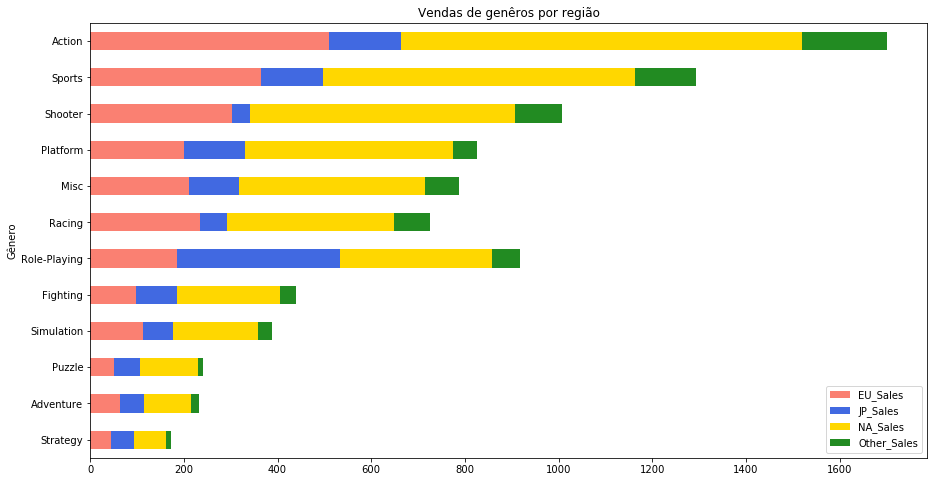

In [45]:
#Organizando Dados
df2 = df[df.columns.difference(['Rank', 'Year', 'Global_Sales'])]

var = df2.groupby(['Genre']).sum().sort_values('NA_Sales', ascending=True)
#Plotando Gráfico
var.plot(kind='barh', 
                   stacked=True, 
                   color=['salmon','royalblue','gold','forestgreen','pink','crimson','cyan','slategray','midnightblue','darkred','burlywood','darkolivegreen'], 
                   grid=False, 
                   figsize=(15,8),title="Vendas de genêros por região") 
plt.ylabel('Gênero')

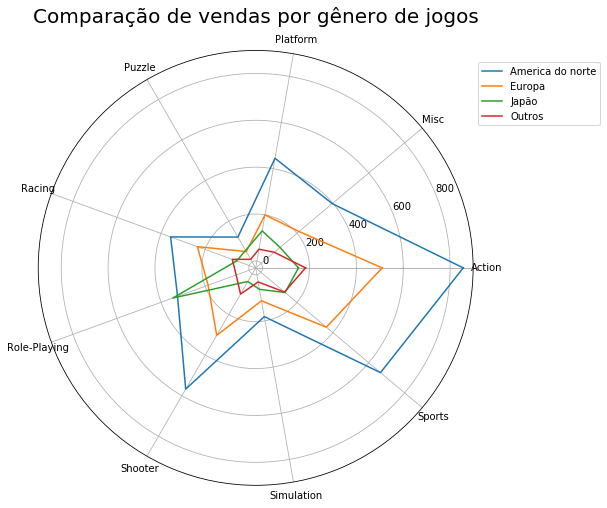

In [46]:
#Definindo as vendas de acordo com o gênero e por região

#São pegos os 10 generos favoritos conforme cada região
NA_favorite_g = list(df.nlargest(10, "NA_Sales")["Genre"].unique())
EU_favorite_g = list(df.nlargest(10, "EU_Sales")["Genre"].unique())
JP_favorite_g = list(df.nlargest(10, "JP_Sales")["Genre"].unique())
Other_favorite_g = list(df.nlargest(10, "Other_Sales")["Genre"].unique())
Global_favorite_g = list(df.nlargest(10, "Global_Sales")["Genre"].unique())
#eliminando os generos repetidos e montando a lista
favorite_genres = list(set(NA_favorite_g+EU_favorite_g+JP_favorite_g+Other_favorite_g+Global_favorite_g))
#selecionando os jogos que possuem esses generos
df_fav_genres = df.loc[df["Genre"].isin(favorite_genres)].groupby("Genre").sum()[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]

categories = list((df_fav_genres["NA_Sales"]).index)

NA_sales = list(df_fav_genres["NA_Sales"])
NA_sales += [NA_sales[0]]
EU_Sales = list(df_fav_genres["EU_Sales"])
EU_Sales += [EU_Sales[0]]
JP_Sales = list(df_fav_genres["JP_Sales"])
JP_Sales += [JP_Sales[0]]
Other_Sales = list(df_fav_genres["Other_Sales"])
Other_Sales += [Other_Sales[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(NA_sales))

#plotando o gráfico
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, NA_sales, label='America do norte')
plt.plot(label_loc, EU_Sales, label='Europa')
plt.plot(label_loc, JP_Sales, label='Japão')
plt.plot(label_loc, Other_Sales, label='Outros')
plt.title('Comparação de vendas por gênero de jogos', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))
plt.show()

<p style='text-align: justify;'> Pode perceber-se uma prefência por gêneros diferentes conforme a região: entre a Europa e a América do Norte há proporcionalmente uma preferência por jogos de ação, esportes e de tiro, já o Japão contrasta com uma preferência por jogos do gênero Rpg.

<p style='text-align: justify;'> Contudo, vale observar que, como mostram os Heatmaps a seguir, tanto na América do Norte quanto no Japão, os genêros que faziam sucesso no começo não são os mesmos que faem sucesso agora

Text(78.0, 0.5, 'Gênero')

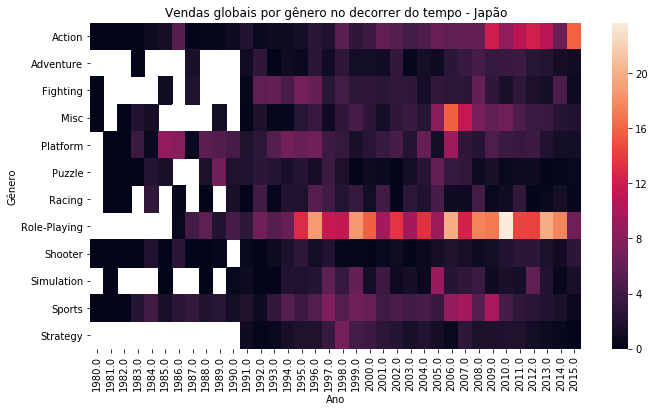

In [75]:
#Organizando Dados
titles_JP = df.pivot_table('JP_Sales', index='Year', columns='Genre', aggfunc=sum)
#Plotando gráfico
fig, ax = plt.subplots(figsize=(11,6))
sns.heatmap(titles_JP.transpose())
plt.title('Vendas globais por gênero no decorrer do tempo - Japão') 
plt.xlabel('Ano') 
plt.ylabel('Gênero') 

Text(78.0, 0.5, 'Gênero')

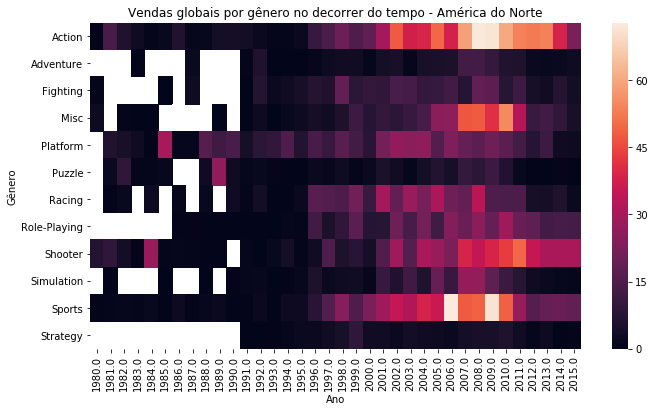

In [74]:
#Organizando Dados
titles_NA = df.pivot_table('NA_Sales', index='Year', columns='Genre', aggfunc=sum)
#Plotando gráfico
fig, ax = plt.subplots(figsize=(11,6))
sns.heatmap(titles_NA.transpose())
plt.title('Vendas globais por gênero no decorrer do tempo - América do Norte') 
plt.xlabel('Ano') 
plt.ylabel('Gênero') 

### Comparativo entre as plataformas da Sony e da Microsoft

Text(0, 0.5, 'Vendas')

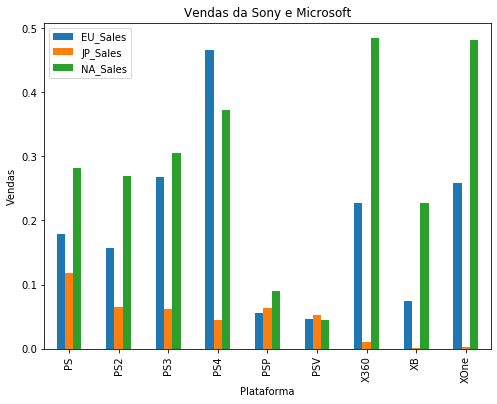

In [54]:
df_platform_region = df[['Platform', 'EU_Sales', 'JP_Sales', 'NA_Sales']]
# selecionando as linhas das plataformas Sony e Microsoft
df3 = df_platform_region[(df_platform_region['Platform'].str.startswith('X')) | (df_platform_region['Platform'].str.startswith('PS'))]
#plotando o gráfico das vendas por região
df3_group = df3.groupby('Platform').mean()
df3_group[['EU_Sales', 'JP_Sales', 'NA_Sales']].plot(kind='bar', figsize=(8,6))
plt.title('Vendas da Sony e Microsoft') 
plt.xlabel('Plataforma') 
plt.ylabel('Vendas') 

<p style='text-align: justify;'>  Um primeiro ponto a se perceber nesse gráfico é que, como ocorre em geral, com execeção do PS4 e o PSV, as vendas foram em maior parte na América do Norte. E o console mais popular por lá, foi o Xbox 360. Além disso, é notável que os console mais vendido da Microsoft e da Sony foram, respectivamente, o Xbox360 e o PS4.

Text(0, 0.5, 'Vendas')

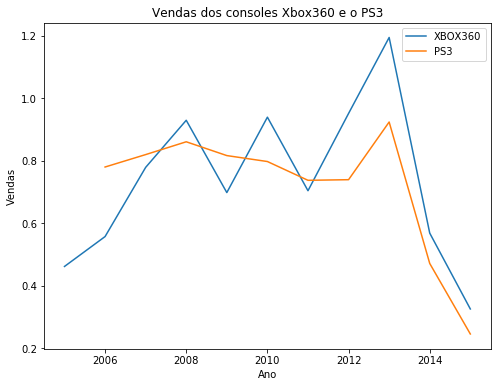

In [58]:
#selecionando linhas da com X360 e o PS4
df4 = df[(df2['Platform'].str.startswith('X360'))].groupby(df['Year']).mean()
df5 = df[(df2['Platform'].str.startswith('PS3'))].groupby(df['Year']).mean()

fig = plt.figure( figsize=(8,6))
ax = plt.axes()
ax.plot(df4['Year'], df4['Global_Sales'], label = 'XBOX360')
ax.plot(df5['Year'], df5['Global_Sales'], label = 'PS3')
plt.legend()
plt.title('Vendas dos consoles Xbox360 e o PS3') 
plt.xlabel('Ano') 
plt.ylabel('Vendas') 

<p style='text-align: justify;'>  Vê-se, que no geral, o XBox360 vendeu mais que o PS3, com execeção do ano de 2009. Os dois consoles foram concorrentes diretos, mas o XBox se mostrou mais popular. Isso porvavelmente ocorreu devido aos preços menores quando comparado com a plataforma da Sony (playstation).
    E como anda a geração mais recente?

Text(0, 0.5, 'Vendas')

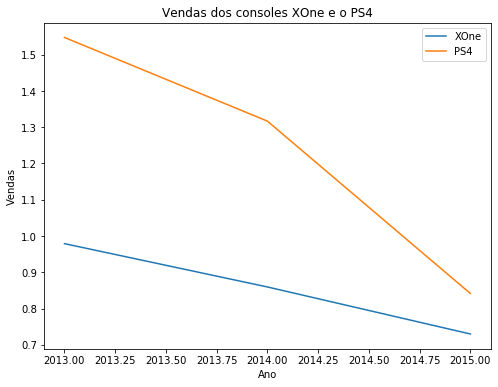

In [59]:
df4 = df[(df2['Platform'].str.startswith('XOne'))].groupby(df['Year']).mean()
df5 = df[(df2['Platform'].str.startswith('PS4'))].groupby(df['Year']).mean()

fig = plt.figure( figsize=(8,6))
ax = plt.axes()
ax.plot(df4['Year'], df4['Global_Sales'], label = 'XOne')
ax.plot(df5['Year'], df5['Global_Sales'], label = 'PS4')
plt.legend()
plt.title('Vendas dos consoles XOne e o PS4') 
plt.xlabel('Ano') 
plt.ylabel('Vendas')

<p style='text-align: justify;'>  Porém na geração seguinte de consoles, o PS4 (da Sony) ultrapassou o XboxOne(da Microsoft). Essa geração, como já visto anteriormente, foi marcada com uma disputa direta entre consoles e computadores. Porém, a Sony mantém jogos exclusivos que só podem ser jogados no PS4, fator esse que provavelmente garantiu que o videogame fosse mais vendido que o do concorrente.

Por fim, abaixo têm-se a vendas de todas as plataformas da Microsoft e Sony no decorrer do tempo. Nele, destaca-se o gráfico de linha do PS4, que já iniciou com uma quantidade de vendas muito altas no seu lançamento, porém decaíram muito rápido também.

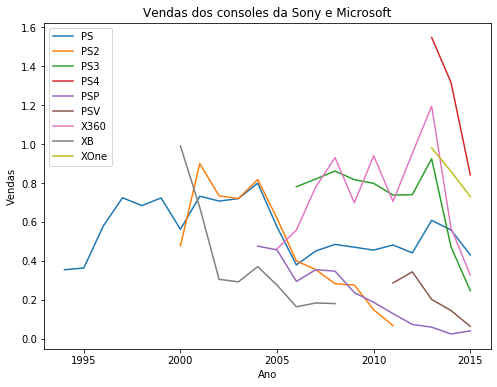

In [61]:
fig = plt.figure( figsize=(8,6))
ax = plt.axes()

for jogo in (df3_group.index.tolist()):
    df4 = df[(df2['Platform'].str.startswith(f'{jogo}'))].groupby(df['Year']).mean()
    ax.plot(df4['Year'], df4['Global_Sales'], label = f'{jogo}')
    plt.legend()
    plt.title('Vendas dos consoles da Sony e Microsoft') 
    plt.xlabel('Ano') 
    plt.ylabel('Vendas')